In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import numpy as np

In [121]:
data = pd.read_csv('./data/망고플레이트전국댓글.csv')

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658251 entries, 0 to 658250
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   리뷰내용    657292 non-null  object
 1   작성자명    657680 non-null  object
 2   후기점수    658251 non-null  object
 3   url     658251 non-null  object
 4   ID      658251 non-null  object
dtypes: object(5)
memory usage: 25.1+ MB


In [123]:
data.head()

,리뷰내용,작성자명,후기점수,url,ID
0,맛있네요,-,맛있다,https://www.mangoplate.com/restaurants/iMRRP69...,iMRRP69qtkeO
1,가로수길,전예원,맛있다,https://www.mangoplate.com/restaurants/iMRRP69...,iMRRP69qtkeO
2,맛있어요,전예원,맛있다,https://www.mangoplate.com/restaurants/iMRRP69...,iMRRP69qtkeO
3,언제와도 맛있는 미라이!!!고등어산도는 무조건 시켜야하구요.. (식빵 뭔지 궁금) ...,스틱스강에맹세하는맛집,맛있다,https://www.mangoplate.com/restaurants/iMRRP69...,iMRRP69qtkeO
4,"아와이 야끼소바,사바산도,우니 아마에비 호다테먹었어요.나마비루도 함께^^나마비루 부...",ㅇㅇ,맛있다,https://www.mangoplate.com/restaurants/iMRRP69...,iMRRP69qtkeO


In [124]:
data['ID'].nunique()

5744

In [125]:
(data.duplicated(['리뷰내용', '작성자명']) == False).sum()

93320

In [126]:
data = data.drop_duplicates(['리뷰내용', '작성자명'])

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93320 entries, 0 to 658250
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   리뷰내용    93180 non-null  object
 1   작성자명    93282 non-null  object
 2   후기점수    93320 non-null  object
 3   url     93320 non-null  object
 4   ID      93320 non-null  object
dtypes: object(5)
memory usage: 4.3+ MB


In [128]:
data['ID'].nunique()

5742

In [129]:
review_counts = data.groupby('ID')[['리뷰내용']].count()

In [130]:
review_counts.sort_values(by='리뷰내용')

,리뷰내용
ID,
UviRfumq8iQn,1
eF3luxR1hKRG,1
eGF1BdBgYhk1,1
eMjRy9-_jSL6,1
eS0BDeT0ZIs4,1
...,...
gL8RksQTNk,239
y-_XMRSTNrAi,241
fPi6OZ3r-u,246


In [131]:
 over20reviews = review_counts[review_counts['리뷰내용'] > 20]

In [132]:
over20reviews

,리뷰내용
ID,
-1rMxmPWvg,32
-1yzcgbtF5,96
-9jLnAAJZc,25
-D6qxV9cg9mT,23
-EDDtVfafvaS,29
...,...
zYzhPaX003,69
z_sD7nAsh7V0,51
zq9bIKh6PMLV,37


In [133]:
print(type(over20reviews))

<class 'pandas.core.frame.DataFrame'>


In [134]:
over20reviews_shops = over20reviews.index

In [135]:
over20reviews_shops

Index(['-1rMxmPWvg', '-1yzcgbtF5', '-9jLnAAJZc', '-D6qxV9cg9mT',
       '-EDDtVfafvaS', '-G-YWwpe9D', '-LWflJV1maU2', '-SMNjUsH3i',
       '-SvQDki5HNzQ', '-UUbd93wKH0H',
       ...
       'zNVXE1__XF', 'zOOlz9vfJfFF', 'zSujg5KWKY1W', 'zSxicuDvNH',
       'zWVgSFqWIQrj', 'zYzhPaX003', 'z_sD7nAsh7V0', 'zq9bIKh6PMLV',
       'ztTTr81jaBm7', 'zv1rcsrmRU4S'],
      dtype='object', name='ID', length=1117)

전체 데이터에서 over20reviews_shops 에 해당하는 가게만 필터링 해서 새로운 데이터 프레임 만들기


In [136]:
over20df = data[data['ID'].apply(lambda x: x in over20reviews_shops)]

리뷰내용 길이가 4 이상인 리뷰만 남김

In [137]:
over20df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60673 entries, 0 to 657696
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   리뷰내용    60559 non-null  object
 1   작성자명    60644 non-null  object
 2   후기점수    60673 non-null  object
 3   url     60673 non-null  object
 4   ID      60673 non-null  object
dtypes: object(5)
memory usage: 2.8+ MB


In [138]:
over20df['리뷰내용'] = over20df['리뷰내용'].astype('str')

C:\Users\hi\AppData\Local\Temp\ipykernel_7308\3256979473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  over20df['리뷰내용'] = over20df['리뷰내용'].astype('str')


In [139]:
# 리뷰내용 길이가 4이상인 데이터만 저장
over20df = over20df[over20df['리뷰내용'].apply(len) >= 4]

In [140]:
over20df['ID'].nunique()

1117

ID별로 변수를 생성하고 ID별 데이터 프레임 생성

* global()을 이용해 자동으로 변수 만들기
* globals()['변수명']

In [141]:
# 변수를 만들때는 문자열 포멧팅으로 만들 수 없음.
# for index, name in enumerate(over20reviews_shops):
#     f"test{index}" = data[data['ID'] == name]

In [142]:
over20df['ID'].str.replace("-","_")

0         iMRRP69qtkeO
1         iMRRP69qtkeO
2         iMRRP69qtkeO
3         iMRRP69qtkeO
4         iMRRP69qtkeO
              ...     
657692      1rKcioby5B
657693      1rKcioby5B
657694      1rKcioby5B
657695      1rKcioby5B
657696      1rKcioby5B
Name: ID, Length: 60093, dtype: object

In [143]:
ids = list(set(over20df['ID']))

In [150]:
print(type(ids))

<class 'list'>


In [144]:
len(ids)

1117

In [158]:
def dfbyid(ids):
    dfs = []
    for index, id_name in enumerate(ids):
        globals()[f"d_{id_name}"] = over20df[over20df['ID'] == id_name] # 변수를 자동으로 생성해서 id별 dataframe만듬
        dfs.append("d_" + id_name) # id가 숫자로 시작하면 변수생성이 안되므로 앞에 'd_'를 붙임
        # print(f"{ids + 1}/{len(ids)} 처리중", end='\r') 
        print(f"{index + 1}/{len(ids)} 처리중", end='\r') # 현재 진행 사항 표시
    return dfs

In [159]:
dfs = dfbyid(ids)

In [160]:
dfs

['d__47PQHcxiP',
 'd_nM_OY-xqhdkO',
 'd_1LDBYlR7ZW',
 'd_RuhAIld9MRhW',
 'd_PQaNjVqEnjj-',
 'd_hvXIIKWqv3V3',
 'd_PWY1oxDaBZ',
 'd_asbzWXaJjd',
 'd_IGPyzMELa6',
 'd_9MBV426tZfQc',
 'd_Gotsc3J4iMFv',
 'd_OJgUhmMaJOPI',
 'd_Ybpa3V5d_aQw',
 'd_Yvk9prtD5n9U',
 'd_xnnLJ68ll1',
 'd_f2yM7Ac3f--8',
 'd_Hnt91DobCS',
 'd_Q47u85Ilxg',
 'd_5w3XQVn5Ce',
 'd_Jpan4MocWZP2',
 'd_dbZtB1usggE2',
 'd_l4xy6mRsW0tK',
 'd_ugq5zpw24LjX',
 'd_Qmjyzoyz2-',
 'd_AUBFvfRpvC4J',
 'd_o3LQKSkc78',
 'd_jir8uDJCA14B',
 'd_toc6p0Z4J3',
 'd_e7WmbTezA-',
 'd_Gv4eevh7WFa6',
 'd_QPKEOPHiXM',
 'd_DKzrMaulXR',
 'd_K72n2CbmYubj',
 'd_EO8wZBq26I',
 'd_Eu4M-LuotC93',
 'd_uRyOm-frZKEJ',
 'd_Yx9sin8OvFy6',
 'd_jVWVR4ScMaHt',
 'd_ek0x9JLb5y',
 'd_Fvgyq1HAiny6',
 'd_n9ZwosnPSP',
 'd__zpN-V3Ogj',
 'd_lmV7-IPVgD3m',
 'd_EQB1ieEn8jac',
 'd_OJui0Tcsdd29',
 'd_lqcBo6HquL',
 'd_MuP_lze1DtYJ',
 'd_iajeeTwC-J',
 'd_ZqLhbXSyWF',
 'd_quiOCe8agT',
 'd_YqO915KDI9',
 'd_VRGicl0oDQ5O',
 'd_ZiIldxQxUr',
 'd_TiUni946ZA8c',
 'd_1YOKBfjGS7LU',
 'd_u

* id별 데이터프레임에서 리뷰내용를 추출해 id별 변수에 합치고, 텍스트 전처리 하고 워드클라우드 만들기

(-0.5, 399.5, 199.5, -0.5)

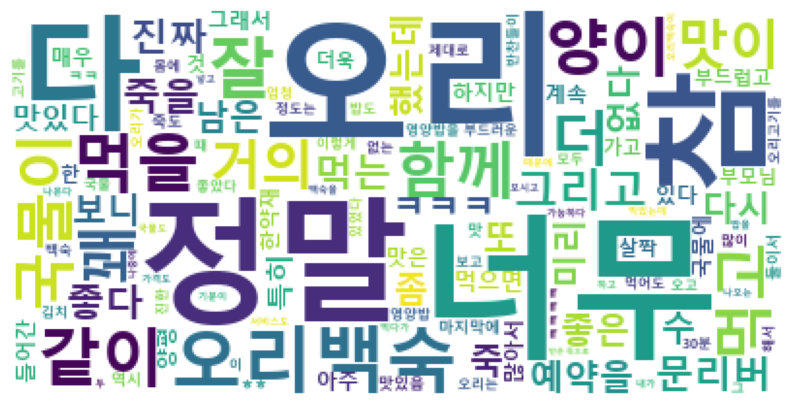

In [193]:
import string
from emoji import core
from wordcloud import WordCloud

font_path = '‪C:\Windows\Fonts\malgunbd.ttf'
test = []
d__47PQHcxiP['리뷰내용'].apply(lambda x: test.append(x))
test = " ".join(test)
test.translate(str.maketrans("."," ", string.punctuation)).replace('ㅎㅎ',' ').replace('ㅋ',' ').replace('ㅋㅋ',' ').replace('ㅠㅠ',' ').replace('ㅜㅜ',' ').replace('   ',' ').replace('  ',' ')
core.replace_emoji(test).replace('ㅎㅎ','').replace('|','')

# 워드 클라우드 만들기
wc = WordCloud(
    max_words= 200,
    font_path= font_path,
    background_color = 'white',
    stopwords = [],
    ).generate(test)
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
# plt.savefig('test.png') 저장할때 사용
# plt.close()